## 1
Выберите наборы данных. которые можно интерпретировать, как временные ряды:

а) зависимость цены на недвижимость в конкретном регионе от времени, __можно интерпретировать как временной ряд__

б) скорость полета самолета при перелете из аэропорта А в аэропорт В, __если замеры производить с определенной периодичностью и если выбрать в качестве моментов времени в которые производится измерение скорости равное, скажем, 1 минуте, то это можно интерпретировать как временной ряд, да__

в) количество отказов компьютера, __если подсчет проивзодить в определенные интервалы времени и если выбрать в качестве интервалов, в течении которых проводится фиксация количства отказов, период времени равный, скажем, 1 дню, то это можно интерпретировать как врменной ряд, да__

г) число обращений в поликлинику по району, __если подсчет проивзодить в определенные интервалы времени и если выбрать в качестве интервалов, в течении которых проводится фиксация числа обращений, период времени равный, скажем, 1 дню, то это можно интерпретировать как врменной ряд, да__

д) координаты автобуса при движении по маршруту, __если замеры координат(широта и долгота) производить с определенной периодичностью и если выбрать в качестве моментов времени в которые производится фиксация координат, скажем, 1 минуту, то это можно интерпретировать как многомерный временной ряд в котором уровнями будут широта и долгота, да__

е) координаты фигуры нарушителя в файле видеофиксации охранной системы. __если замеры координат(по осям видео - Х и Y) производить с определенной периодичностью и если выбрать в качестве моментов времени в которые производится фиксация координат, скажем, 1 минуту, то это можно интерпретировать как многомерный временной ряд в котором уровнями будут координаты X и Y положения объекта в кадре видеофайла, да__

## 2
Прочитайте DUQ_hourly.csv и проверьте качество и порядок разметки этой выборки с информацией о потреблении энергии в одном из районов Восточной Электросети США. Сделайте описание особенностей этой выборки.



In [228]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [200]:
duq = pd.read_csv('DUQ_hourly.csv', index_col=[0], parse_dates=[0])

In [201]:
duq.head()

,DUQ_MW
Datetime,
2005-12-31 01:00:00,1458.0
2005-12-31 02:00:00,1377.0
2005-12-31 03:00:00,1351.0
2005-12-31 04:00:00,1336.0
2005-12-31 05:00:00,1356.0


In [202]:
duq.describe()

,DUQ_MW
count,119068.000000
mean,1658.820296
std,301.740640
min,1014.000000
25%,1444.000000
50%,1630.000000
75%,1819.000000
max,3054.000000


In [203]:
duq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


Text(0, 0.5, 'МВт')

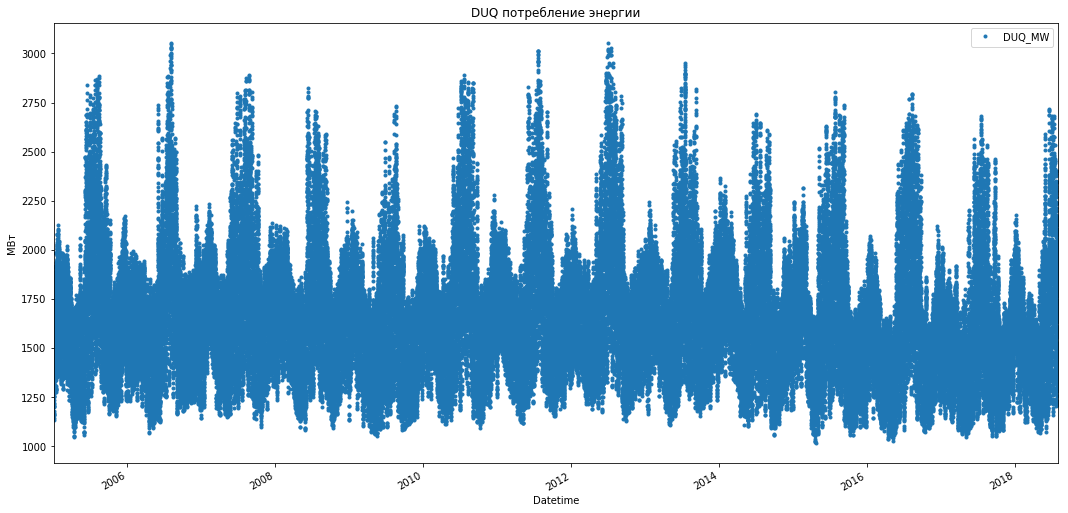

In [204]:
duq.plot( style = '.', figsize = ( 18, 9 ), title = 'DUQ потребление энергии' )
plt.ylabel ( 'МВт' )

In [205]:
duq.DUQ_MW.isnull().sum()

0

In [206]:
duq.index.unique().shape[0]

119064

In [207]:
duq.index.value_counts().head()

2017-11-05 02:00:00    2
2014-11-02 02:00:00    2
2015-11-01 02:00:00    2
2016-11-06 02:00:00    2
2007-07-15 10:00:00    1
Name: Datetime, dtype: int64

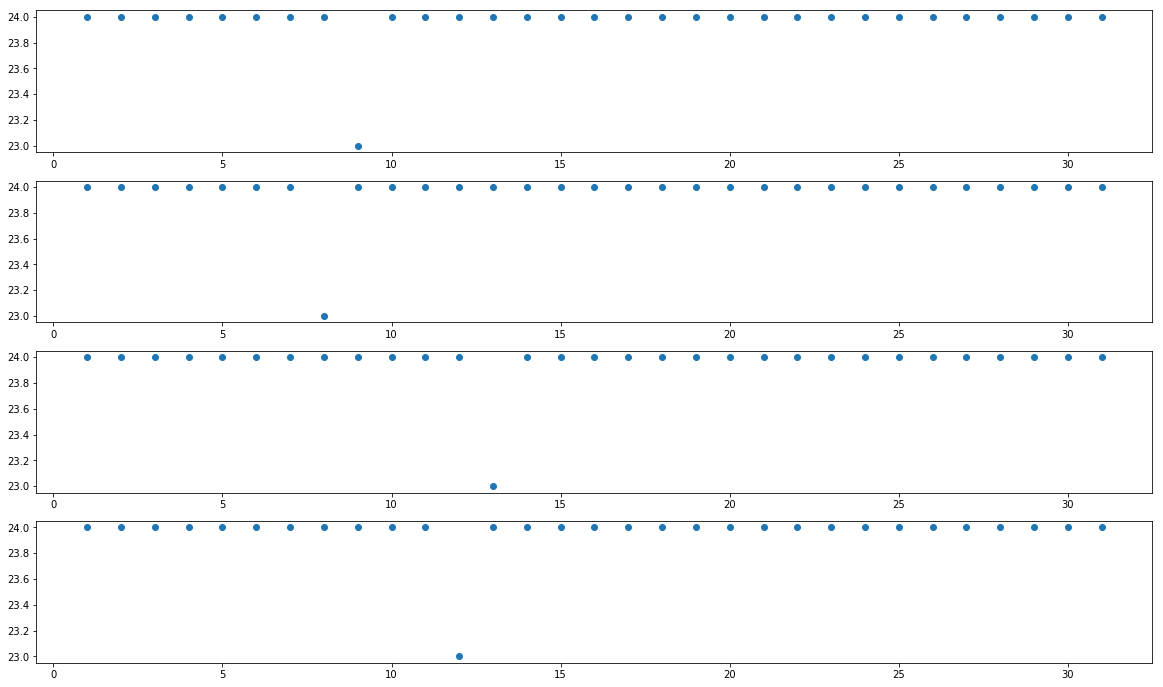

In [208]:
day_14= duq.loc[(duq.index.year==2014) & (duq.index.month==3)].index.day
day_15= duq.loc[(duq.index.year==2015) & (duq.index.month==3)].index.day
day_16= duq.loc[(duq.index.year==2016) & (duq.index.month==3)].index.day
day_17= duq.loc[(duq.index.year==2017) & (duq.index.month==3)].index.day

plt.figure(figsize=(20,12))

plt.subplot(4,1,1)
plt.plot(day_14.value_counts().index, day_14.value_counts().values ,'o')

plt.subplot(4,1,2)
plt.plot(day_15.value_counts().index, day_15.value_counts().values ,'o')

plt.subplot(4,1,3)
plt.plot(day_16.value_counts().index, day_16.value_counts().values ,'o')

plt.subplot(4,1,4)
plt.plot(day_17.value_counts().index, day_17.value_counts().values ,'o')


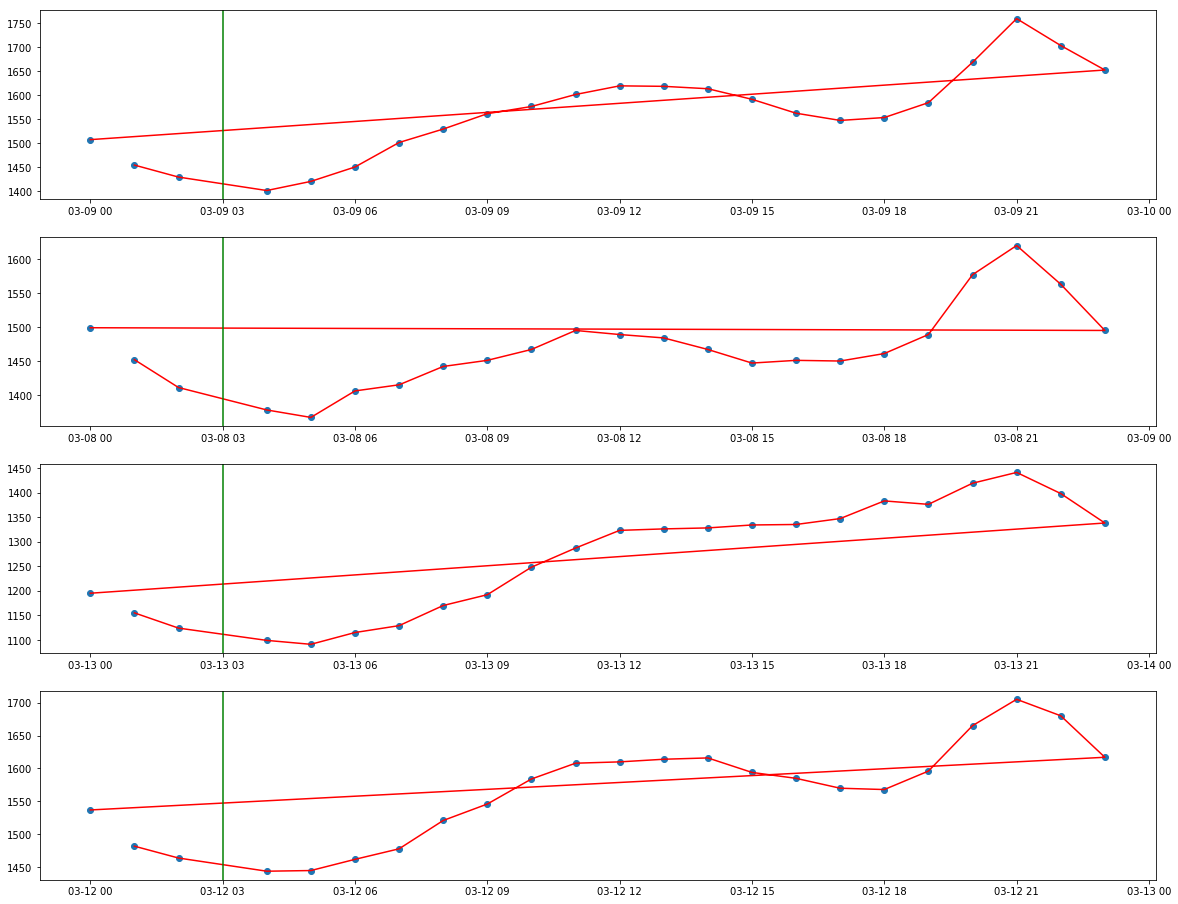

In [209]:
plt.figure(figsize=(20,16))
plt.subplot(4,1,1)
df = duq.loc[(duq.index.year==2014) & (duq.index.month==3) & (duq.index.day==9)]
plt.plot(df.index, df.DUQ_MW.values, 'o')
plt.plot(df.index, df.DUQ_MW.values, 'r')
dt = pd.to_datetime('2014-03-09 03:00:00')
plt.axvline(dt, color = 'green')

plt.subplot(4,1,2)
df = duq.loc[(duq.index.year==2015) & (duq.index.month==3) & (duq.index.day==8)]
plt.plot(df.index, df.DUQ_MW.values, 'o')
plt.plot(df.index, df.DUQ_MW.values, 'r')
dt = pd.to_datetime('2015-03-08 03:00:00')
plt.axvline(dt, color = 'green')

plt.subplot(4,1,3)
df = duq.loc[(duq.index.year==2016) & (duq.index.month==3) & (duq.index.day==13)]
plt.plot(df.index, df.DUQ_MW.values, 'o')
plt.plot(df.index, df.DUQ_MW.values, 'r')
dt = pd.to_datetime('2016-03-13 03:00:00')
plt.axvline(dt, color = 'green')

plt.subplot(4,1,4)
df = duq.loc[(duq.index.year==2017) & (duq.index.month==3) & (duq.index.day==12)]
plt.plot(df.index, df.DUQ_MW.values, 'o')
plt.plot(df.index, df.DUQ_MW.values, 'r')
dt = pd.to_datetime('2017-03-12 03:00:00')
plt.axvline(dt, color = 'green')


In [210]:
df = pd.DataFrame(data = [duq['2017-03-12 02:00:00':'2017-03-12 04:00:00'].DUQ_MW.mean(),
                 duq['2016-03-13 02:00:00':'2016-03-13 04:00:00'].DUQ_MW.mean(),
                 duq['2015-03-08 02:00:00':'2015-03-08 04:00:00'].DUQ_MW.mean(),
                 duq['2014-03-09 02:00:00':'2014-03-09 04:00:00'].DUQ_MW.mean()],
                  columns=['DUQ_MW'],
                  index = pd.to_datetime(pd.Series(['2017-03-12 03:00:00','2016-03-13 03:00:00',
                                                    '2015-03-08 03:00:00','2014-03-09 03:00:00']
                 )))
duq = duq.append(df)

In [213]:
df = duq.loc[duq.index.value_counts()>1]
indexes = df.index
df['date'] = indexes
duq_mw_m = df.groupby('date').mean().DUQ_MW.values

for i, v in enumerate(df.index.unique()):
    duq.loc[duq.index == v.strftime('%Y-%m-%d %H:%M:%S'), 'DUQ_MW'] = duq_mw_m[i]

duq = duq.groupby(duq.index).first()    

C:\Users\NKP_IT\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [225]:
duq.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119068 entries, 2005-01-01 01:00:00 to 2018-08-03 00:00:00
Data columns (total 1 columns):
DUQ_MW    119068 non-null float64
dtypes: float64(1)
memory usage: 1.8 MB


In [229]:
duq.index.unique().shape[0]

119068

In [226]:
duq = duq.sort_index()

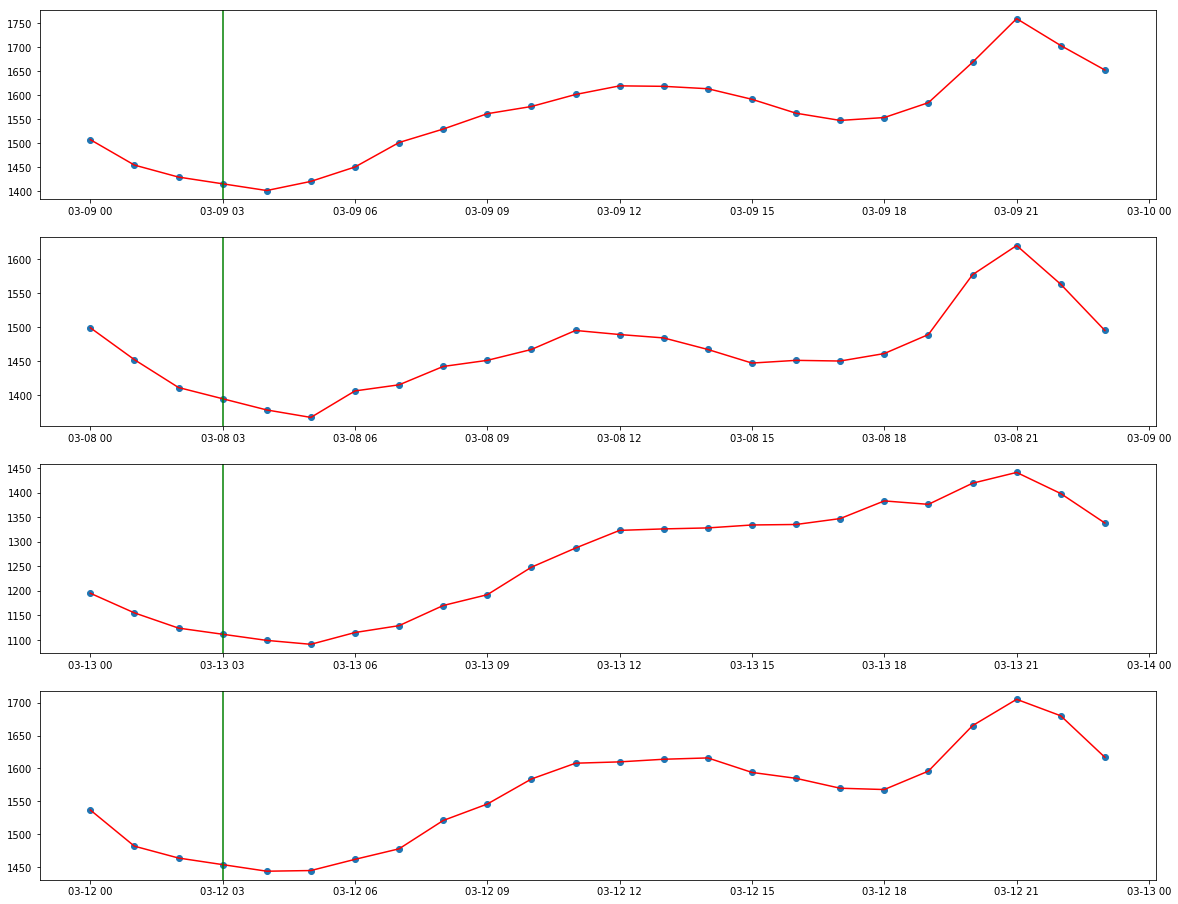

In [227]:
plt.figure(figsize=(20,16))
plt.subplot(4,1,1)
df = duq.loc[(duq.index.year==2014) & (duq.index.month==3) & (duq.index.day==9)]
plt.plot(df.index, df.DUQ_MW.values, 'o')
plt.plot(df.index, df.DUQ_MW.values, 'r')
dt = pd.to_datetime('2014-03-09 03:00:00')
plt.axvline(dt, color = 'green')

plt.subplot(4,1,2)
df = duq.loc[(duq.index.year==2015) & (duq.index.month==3) & (duq.index.day==8)]
plt.plot(df.index, df.DUQ_MW.values, 'o')
plt.plot(df.index, df.DUQ_MW.values, 'r')
dt = pd.to_datetime('2015-03-08 03:00:00')
plt.axvline(dt, color = 'green')

plt.subplot(4,1,3)
df = duq.loc[(duq.index.year==2016) & (duq.index.month==3) & (duq.index.day==13)]
plt.plot(df.index, df.DUQ_MW.values, 'o')
plt.plot(df.index, df.DUQ_MW.values, 'r')
dt = pd.to_datetime('2016-03-13 03:00:00')
plt.axvline(dt, color = 'green')

plt.subplot(4,1,4)
df = duq.loc[(duq.index.year==2017) & (duq.index.month==3) & (duq.index.day==12)]
plt.plot(df.index, df.DUQ_MW.values, 'o')
plt.plot(df.index, df.DUQ_MW.values, 'r')
dt = pd.to_datetime('2017-03-12 03:00:00')
plt.axvline(dt, color = 'green')


## 3
Прочитайте базу Brent и сделайте ее перерасчет (ресемплинг) в представление по неделям , по месяцам.

## 4
Постройте график изменения среднего по выборке и среднего отклонения по выборке на недельных, месячных и годовых группах для Brent.

In [426]:
brent_per_day = pd.read_excel('brent 2010-2019.xlsx', index_col=[0], parse_dates=[0]).sort_index()

In [427]:
brent_per_day.head()

,Значение
Дата,
2010-09-01,76.37
2010-09-02,76.89
2010-09-03,76.57
2010-09-04,76.62
2010-09-05,76.63


In [428]:
brent_per_day.describe()

,Значение
count,2667.000000
mean,81.533547
std,26.349469
min,27.850000
25%,56.840000
50%,77.710000
75%,108.190000
max,126.900000


Text(0, 0.5, 'USD')

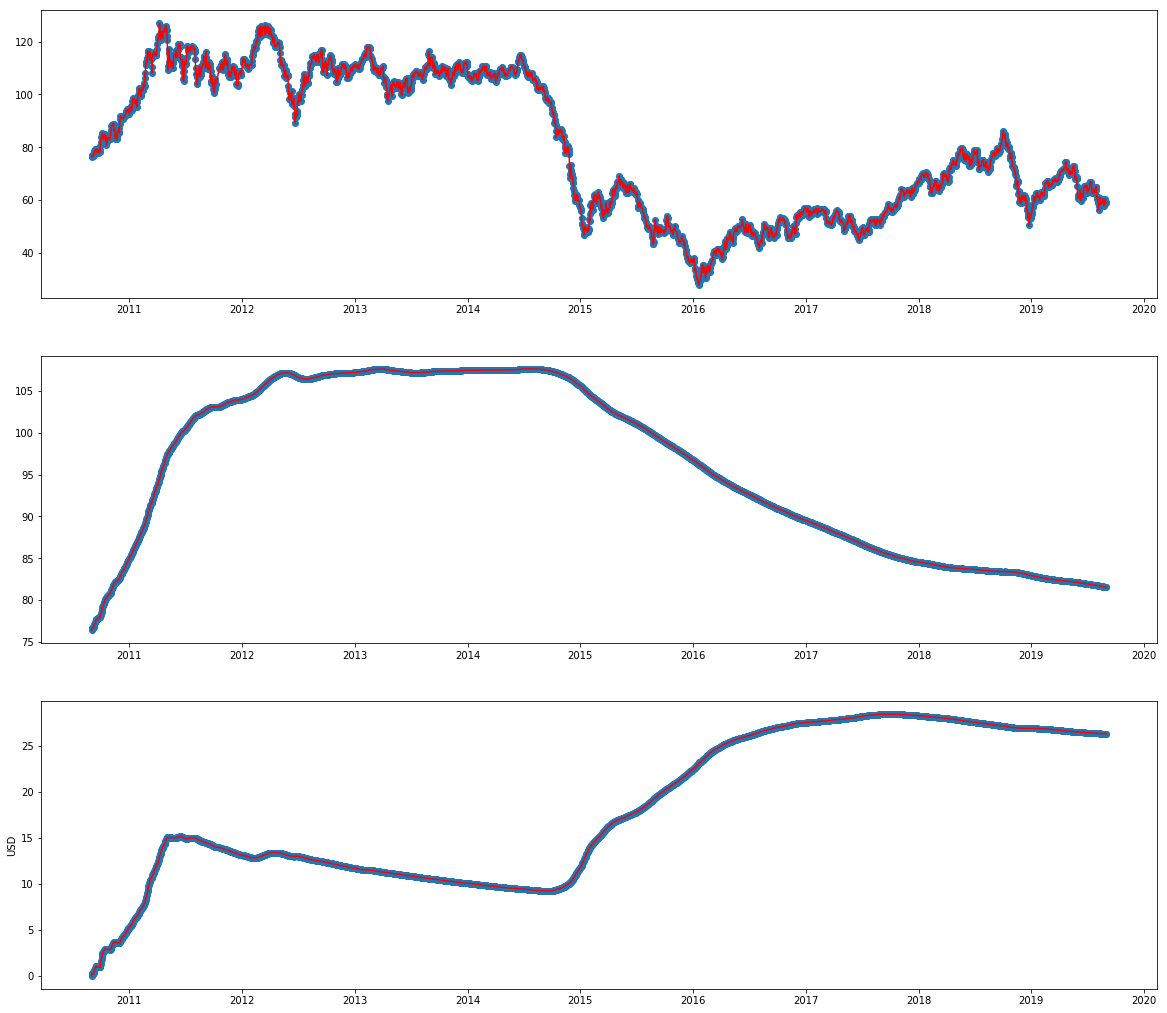

In [429]:
mean_brent_per_day = []
std_brent_per_day = []

for i in brent_per_day.index:
    mean_brent_per_day.append(np.mean(brent_per_day[:i].values))
    std_brent_per_day.append(np.std(brent_per_day[:i].values))
    
brent_per_day['mean_'] = mean_brent_per_day
brent_per_day['std_'] = std_brent_per_day


plt.figure(figsize=(20,18))
plt.subplot(3,1,1)
plt.plot(brent_per_day.index, brent_per_day.Значение, 'o')
plt.plot(brent_per_day.index, brent_per_day.Значение, 'r')

plt.subplot(3,1,2)
plt.plot(brent_per_day.index, brent_per_day.mean_, 'o')
plt.plot(brent_per_day.index, brent_per_day.mean_, 'r')

plt.subplot(3,1,3)
plt.plot(brent_per_day.index, brent_per_day.std_, 'o')
plt.plot(brent_per_day.index, brent_per_day.std_, 'r')


plt.ylabel ( 'USD' )

Text(0, 0.5, 'USD')

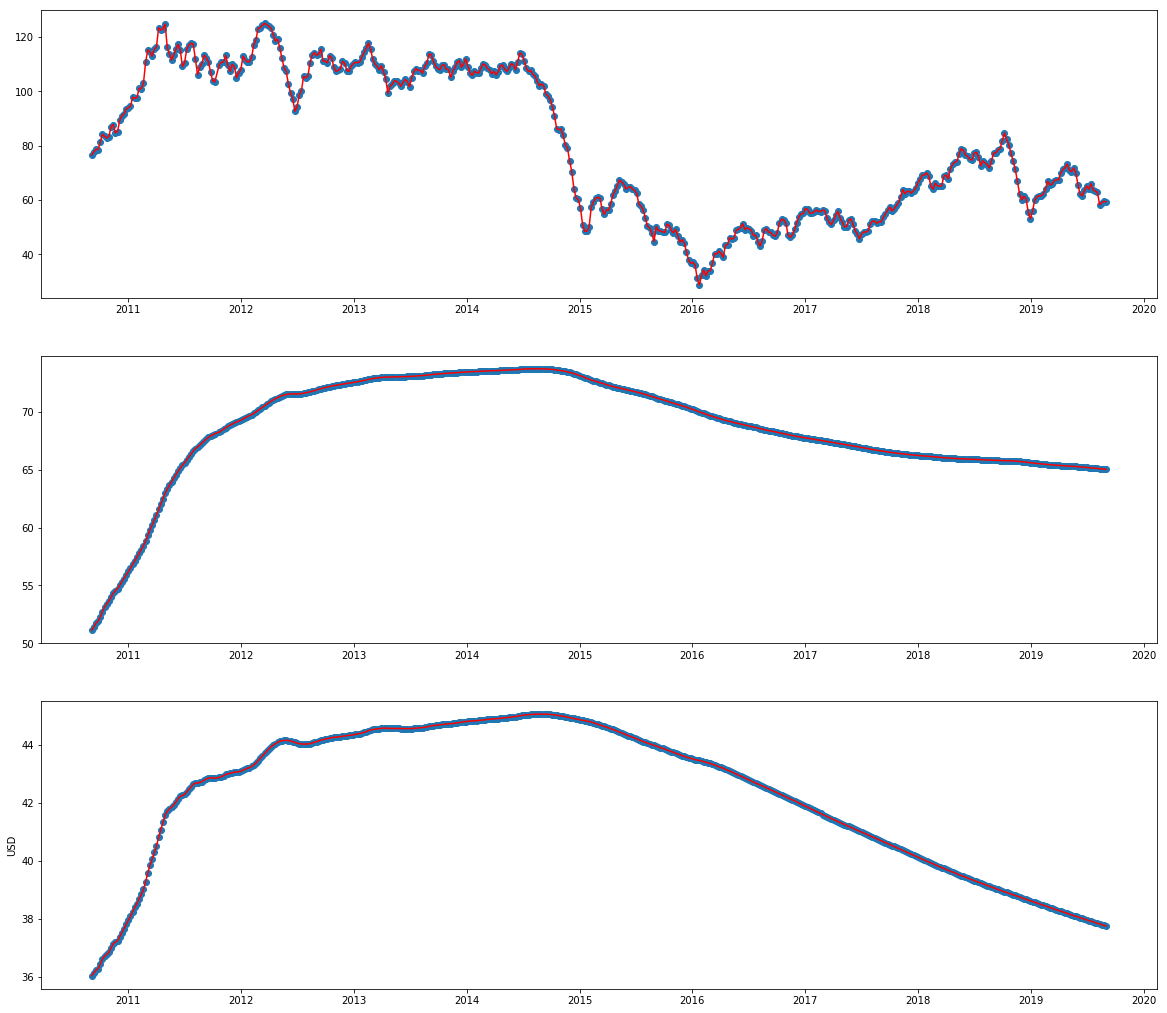

In [430]:
brent_per_week = brent_per_day.resample('W').mean().dropna().sort_index()

mean_brent_per_week = []
std_brent_per_week = []

for i in brent_per_week.index:
    mean_brent_per_week.append(np.mean(brent_per_week[:i].values))
    std_brent_per_week.append(np.std(brent_per_week[:i].values))
    
brent_per_week['mean_'] = mean_brent_per_week
brent_per_week['std_'] = std_brent_per_week


plt.figure(figsize=(20,18))
plt.subplot(3,1,1)
plt.plot(brent_per_week.index, brent_per_week.Значение, 'o')
plt.plot(brent_per_week.index, brent_per_week.Значение, 'r')

plt.subplot(3,1,2)
plt.plot(brent_per_week.index, brent_per_week.mean_, 'o')
plt.plot(brent_per_week.index, brent_per_week.mean_, 'r')

plt.subplot(3,1,3)
plt.plot(brent_per_week.index, brent_per_week.std_, 'o')
plt.plot(brent_per_week.index, brent_per_week.std_, 'r')


plt.ylabel ( 'USD' )

Text(0, 0.5, 'USD')

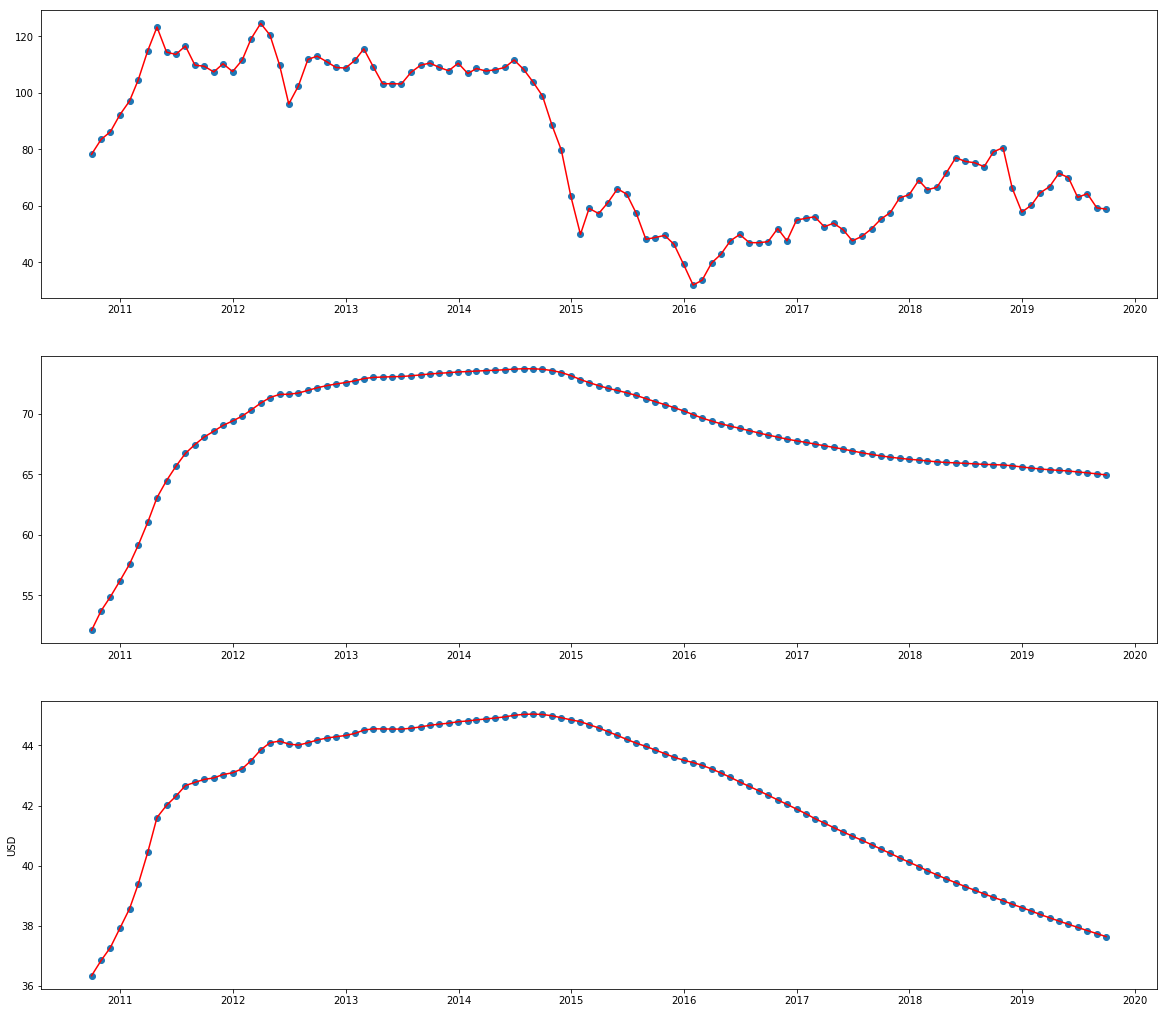

In [423]:
brent_per_month = brent_per_day.resample('M').mean().dropna()

mean_brent_per_month = []
std_brent_per_month = []

for i in brent_per_month.index:
    mean_brent_per_month.append(np.mean(brent_per_month[:i].values))
    std_brent_per_month.append(np.std(brent_per_month[:i].values))
    
brent_per_month['mean_'] = mean_brent_per_month
brent_per_month['std_'] = std_brent_per_month


plt.figure(figsize=(20,18))
plt.subplot(3,1,1)
plt.plot(brent_per_month.index, brent_per_month.Значение, 'o')
plt.plot(brent_per_month.index, brent_per_month.Значение, 'r')

plt.subplot(3,1,2)
plt.plot(brent_per_month.index, brent_per_month.mean_, 'o')
plt.plot(brent_per_month.index, brent_per_month.mean_, 'r')

plt.subplot(3,1,3)
plt.plot(brent_per_month.index, brent_per_month.std_, 'o')
plt.plot(brent_per_month.index, brent_per_month.std_, 'r')


plt.ylabel ( 'USD' )

Text(0, 0.5, 'USD')

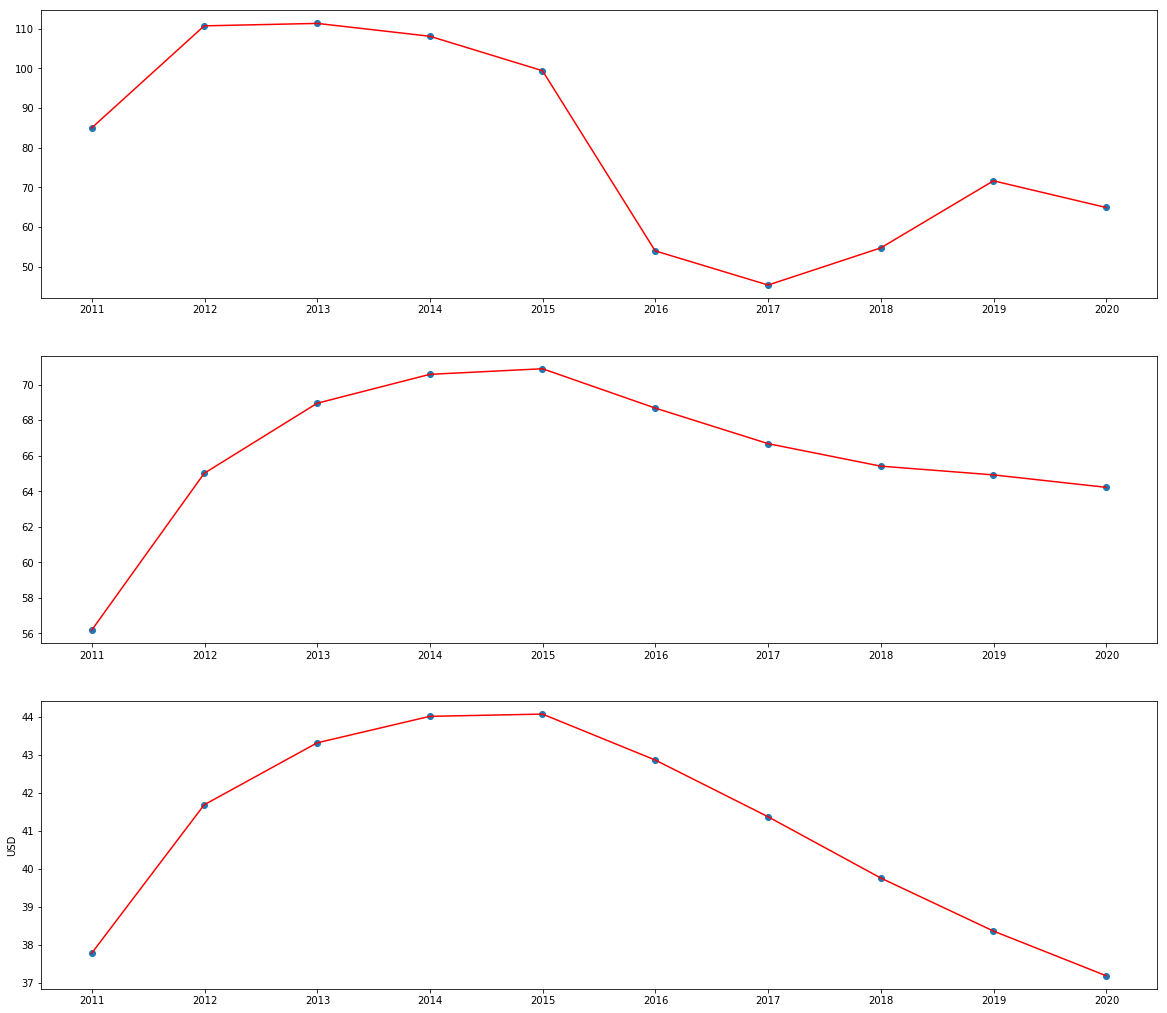

In [424]:
brent_per_year = brent_per_day.resample('Y').mean().dropna()

mean_brent_per_year = []
std_brent_per_year = []

for i in brent_per_year.index:
    mean_brent_per_year.append(np.mean(brent_per_year[:i].values))
    std_brent_per_year.append(np.std(brent_per_year[:i].values))
    
brent_per_year['mean_'] = mean_brent_per_year
brent_per_year['std_'] = std_brent_per_year


plt.figure(figsize=(20,18))
plt.subplot(3,1,1)
plt.plot(brent_per_year.index, brent_per_year.Значение, 'o')
plt.plot(brent_per_year.index, brent_per_year.Значение, 'r')

plt.subplot(3,1,2)
plt.plot(brent_per_year.index, brent_per_year.mean_, 'o')
plt.plot(brent_per_year.index, brent_per_year.mean_, 'r')

plt.subplot(3,1,3)
plt.plot(brent_per_year.index, brent_per_year.std_, 'o')
plt.plot(brent_per_year.index, brent_per_year.std_, 'r')


plt.ylabel ( 'USD' )